<a href="https://colab.research.google.com/github/somyamangla/SupervisedLearningAlgorithm/blob/main/Random_Forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classifier

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [ ]:
df = pd.read_csv('credit_card.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
df.shape

(190239, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190239 entries, 0 to 190238
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    190239 non-null  float64
 1   V1      190239 non-null  float64
 2   V2      190239 non-null  float64
 3   V3      190238 non-null  float64
 4   V4      190238 non-null  float64
 5   V5      190238 non-null  float64
 6   V6      190238 non-null  float64
 7   V7      190238 non-null  float64
 8   V8      190238 non-null  float64
 9   V9      190238 non-null  float64
 10  V10     190238 non-null  float64
 11  V11     190238 non-null  float64
 12  V12     190238 non-null  float64
 13  V13     190238 non-null  float64
 14  V14     190238 non-null  float64
 15  V15     190238 non-null  float64
 16  V16     190238 non-null  float64
 17  V17     190238 non-null  float64
 18  V18     190238 non-null  float64
 19  V19     190238 non-null  float64
 20  V20     190238 non-null  float64
 21  V21     19

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,190239.000000,190239.000000,190239.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000,190238.000000
mean,67549.991973,-0.122651,0.010621,0.371211,0.086960,-0.131764,0.050747,-0.059859,0.021667,0.011955,-0.015835,0.145830,-0.078286,0.044943,0.059461,0.097412,-0.005611,0.030626,-0.040867,-0.014643,0.023199,-0.017987,-0.058429,-0.017677,0.005460,0.070235,0.007879,0.001805,0.002104,89.281222,0.001950
std,32625.905925,1.884429,1.621432,1.432007,1.392225,1.356895,1.306926,1.213701,1.212357,1.139973,1.092347,1.043141,1.108230,1.036794,0.972354,0.947139,0.885821,0.897409,0.838878,0.817408,0.744236,0.739441,0.684783,0.605855,0.602417,0.483307,0.489267,0.393436,0.311373,248.469377,0.044118
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-22.838548,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,43257.000000,-0.968132,-0.571992,-0.252441,-0.779671,-0.798128,-0.704050,-0.580271,-0.175564,-0.661785,-0.518259,-0.609737,-0.489792,-0.637736,-0.357518,-0.493429,-0.475298,-0.434464,-0.522376,-0.492229,-0.190649,-0.228117,-0.540614,-0.169159,-0.339365,-0.227953,-0.331237,-0.066818,-0.038473,5.990000,0.000000
50%,65180.000000,-0.114371,0.086750,0.532221,0.089121,-0.187199,-0.213456,-0.017382,0.046786,-0.074947,-0.103063,0.082146,0.111830,0.016971,0.079661,0.195852,0.063200,-0.028712,-0.042773,-0.015431,-0.041705,-0.046288,-0.044280,-0.030961,0.054460,0.114020,-0.060716,0.006767,0.019242,22.800000,0.000000
75%,84873.000000,1.203983,0.786654,1.247291,0.903340,0.437256,0.446171,0.488333,0.341456,0.630310,0.433719,0.933894,0.613413,0.718534,0.516998,0.787892,0.530279,0.425006,0.449529,0.470187,0.151938,0.144670,0.405611,0.110402,0.420002,0.388954,0.264620,0.089234,0.078130,79.000000,0.000000
max,128750.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.784514,6.098529,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
df.Class.value_counts()

0.0    189867
1.0       371
Name: Class, dtype: int64

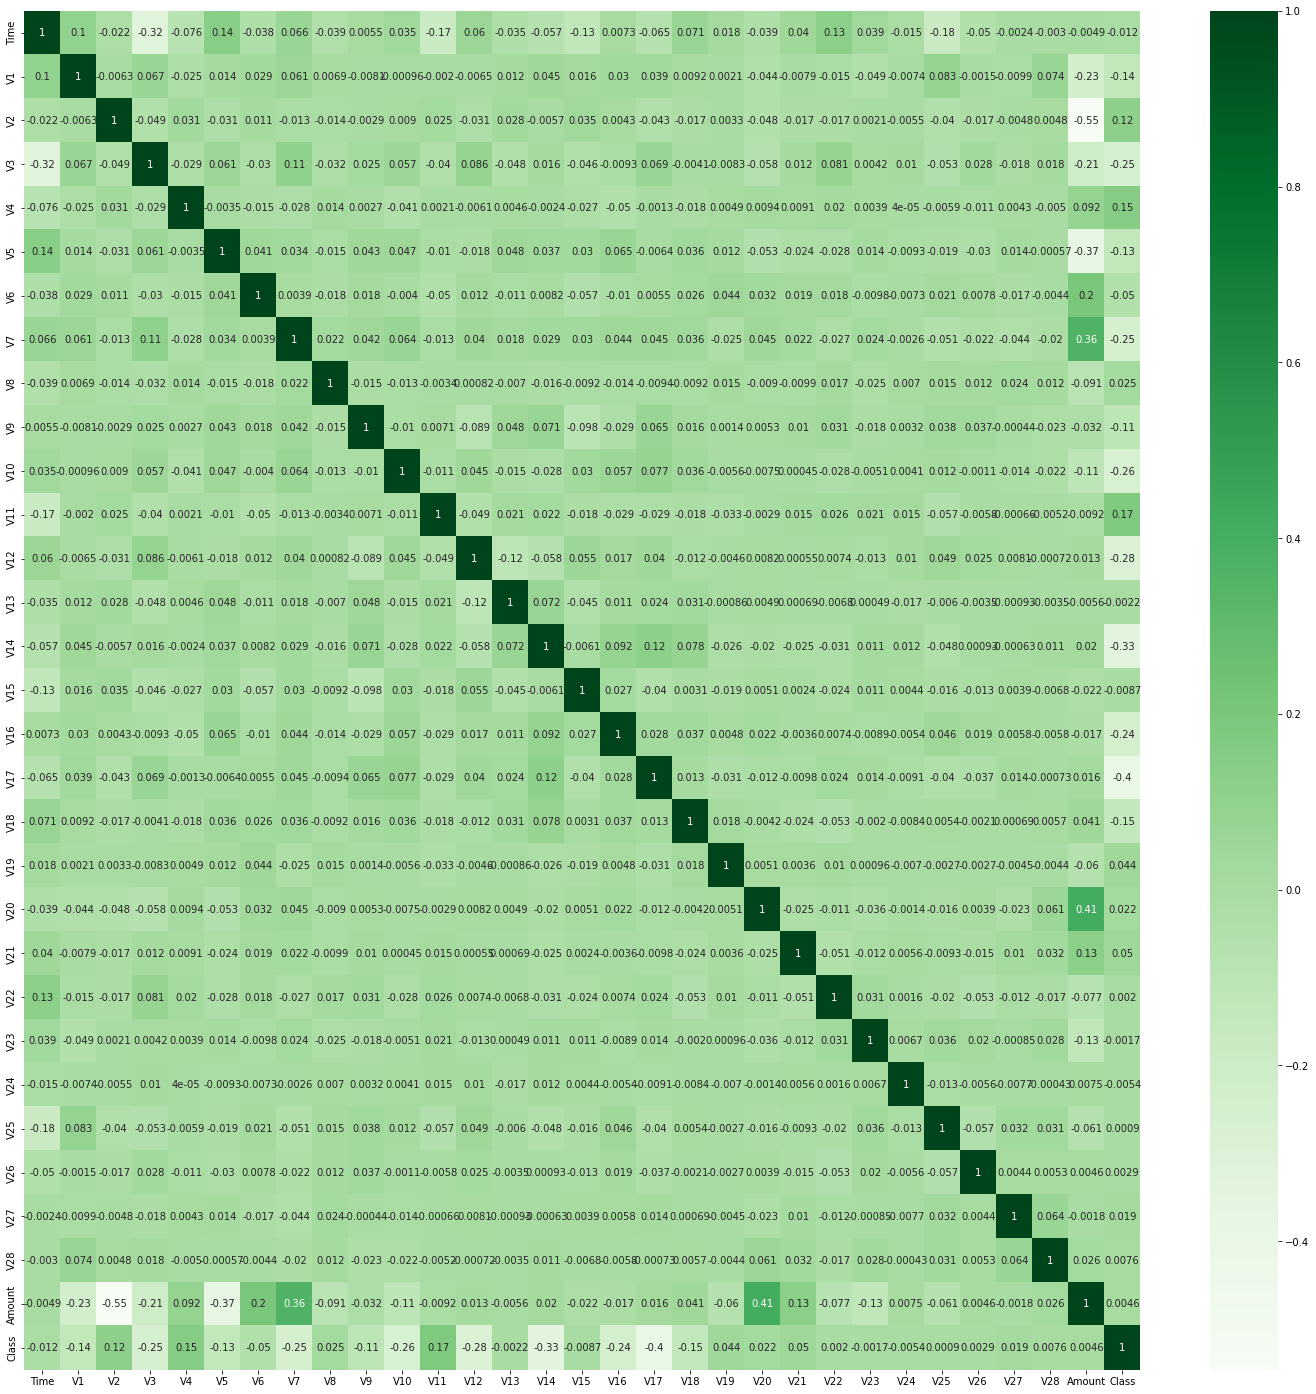

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [ ]:
# Handling Imbalanced dataset


In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
x = df.drop('Class',axis='columns')
y = df['Class']

In [ ]:
smote = SMOTE(sampling_strategy='minority')


In [ ]:
x.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
dtype: int64

In [ ]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190234,128749.0,2.041966,0.174409,-1.711336,0.533765,0.156949,-1.447242,0.244206,-0.354569,0.633990,-0.473109,-0.349180,-0.073322,-0.302472,-0.663418,0.977963,0.158178,0.469970,0.447603,-0.503484,-0.225152,0.200018,0.739193,-0.012997,-0.084867,0.227029,-0.097686,-0.001726,-0.031748,6.68
190235,128749.0,-0.217502,0.913453,0.020849,-0.835175,0.541120,-0.592428,0.887042,-0.004344,-0.013578,0.076053,0.364273,0.446325,-0.490571,0.311369,-1.003868,0.223502,-0.783748,-0.081799,0.325800,0.076793,-0.272937,-0.593312,0.026502,-0.429509,-0.432099,0.151735,0.354753,0.137631,13.99
190236,128750.0,2.068935,0.013847,-2.275414,0.305170,0.938897,0.151034,-0.079624,0.024150,0.625386,-0.511554,0.091487,0.393609,-0.004156,-1.591608,-1.001386,0.668199,0.550587,1.074374,0.606350,-0.092577,-0.057606,0.074640,-0.084997,-0.479828,0.230444,0.654925,-0.051699,-0.043789,10.00
190237,128750.0,1.991961,-2.015101,-0.926487,-1.540712,-1.580846,-0.305510,-1.254461,-0.005932,-1.073746,1.697513,0.024816,-0.936045,-0.855056,-0.078630,-0.574219,-0.026462,0.100906,0.850076,0.211700,-0.207789,-0.052382,-0.037013,0.079387,-0.541760,-0.347793,-0.176883,-0.013358,-0.037445,158.00


In [ ]:
x.drop([190238],axis=0,inplace=True)

In [ ]:
x.isnull().sum().sum()

0

In [ ]:
y


0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
190234    0.0
190235    0.0
190236    0.0
190237    0.0
190238    NaN
Name: Class, Length: 190239, dtype: float64

In [ ]:
y.drop([190238],axis=0,inplace=True)

In [ ]:
x_sm,y_sm= smote.fit_resample(x,y)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Feature selection/ Feature Importance
model = ExtraTreesClassifier()
model.fit(x_sm,y_sm)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
model.feature_importances_

array([0.0105899 , 0.02054457, 0.01409092, 0.09351494, 0.0873609 ,
       0.01047262, 0.00621814, 0.02860623, 0.00802747, 0.03764989,
       0.04815719, 0.11649907, 0.11230601, 0.00781412, 0.14364894,
       0.00515594, 0.07790633, 0.07438375, 0.03834948, 0.01055947,
       0.00407387, 0.00463726, 0.00421741, 0.00363254, 0.00692226,
       0.00459421, 0.005145  , 0.00468459, 0.00586567, 0.0043713 ])

In [ ]:
plt.figure(figsize=(10,10))
feat = pd.Series(model.feature_importances_,index=x_sm.columns)
feat.nlargest(18).plot(kind='barh')


In [ ]:
plot= feat.nlargest(18)

In [ ]:
plot.index

Index(['V14', 'V12', 'V4', 'V17', 'V11', 'V10', 'V3', 'V16', 'V9', 'V18', 'V2',
       'V1', 'V7', 'Time', 'V19', 'V8', 'V27', 'V21'],
      dtype='object')

In [ ]:
cols= ['V14', 'V12', 'V4', 'V17', 'V11', 'V16', 'V3', 'V10', 'V18', 'V9', 'V1',
       'V19', 'V7', 'Time', 'V2', 'V21', 'V6', 'V8']

In [ ]:
x_new= x_sm[cols]

In [ ]:
x_sm.shape

(568630, 30)

In [ ]:
x_new.shape

(568630, 18)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y_sm, test_size = 0.2, random_state = 42)


In [ ]:
randomdf = RandomForestClassifier()

In [ ]:
randomdf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = randomdf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9998768971035648

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisiondf = DecisionTreeClassifier()
decisiondf.fit(X_train,y_train)
ypred = decisiondf.predict(X_test)
accuracy_score(y_test,ypred)

0.9984084554103723